In [1]:
import math
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sms
import seaborn as sns
from scipy.stats import norm
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from statsmodels.tools.tools import add_constant
from sklearn import linear_model
from itertools import cycle
from sklearn.linear_model import lasso_path
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import time
start_time = time.time()

In [3]:
rawdata = pd.read_csv('new_drop_new_month.csv')

In [4]:
print(rawdata.columns.values)

['DateOfCall' 'FirstPumpArriving_AttendanceTime']


In [5]:
rawdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 2 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   DateOfCall                        1600 non-null   object 
 1   FirstPumpArriving_AttendanceTime  1600 non-null   float64
dtypes: float64(1), object(1)
memory usage: 25.1+ KB


In [17]:
rawdata.head()

,DateOfCall,FirstPumpArriving_AttendanceTime
0,2017-01,318.294574
1,2017-01,315.780952
2,2017-01,313.916000
3,2017-01,313.407258
4,2017-01,314.513308


In [7]:
rawdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 2 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   DateOfCall                        1600 non-null   object 
 1   FirstPumpArriving_AttendanceTime  1600 non-null   float64
dtypes: float64(1), object(1)
memory usage: 25.1+ KB


In [8]:
rawdata_null=rawdata[pd.isnull(rawdata['FirstPumpArriving_AttendanceTime'])]

In [9]:

rawdata_ratio = len(rawdata[pd.isnull(rawdata['FirstPumpArriving_AttendanceTime'])])/len(rawdata)
print(rawdata_ratio)

0.0


In [10]:
new_drop=rawdata.dropna(axis=0)
new_drop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1600 entries, 0 to 1599
Data columns (total 2 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   DateOfCall                        1600 non-null   object 
 1   FirstPumpArriving_AttendanceTime  1600 non-null   float64
dtypes: float64(1), object(1)
memory usage: 37.5+ KB


In [11]:
new_drop_new=new_drop.groupby(by='DateOfCall').mean()
new_drop_new.sort_values(by=['DateOfCall'], ascending=True,inplace=True)

In [12]:
new_drop_new.head()

,FirstPumpArriving_AttendanceTime
DateOfCall,
2017-01,317.303269
2017-02,315.129612
2017-03,313.746794
2017-04,313.906553
2017-05,310.035538


In [13]:
new_drop_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53 entries, 2017-01 to 2021-05
Data columns (total 1 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   FirstPumpArriving_AttendanceTime  53 non-null     float64
dtypes: float64(1)
memory usage: 848.0+ bytes


In [24]:
from pandas import read_excel
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from matplotlib import pyplot

In [40]:
# https://www.jianshu.com/p/d9a205ec284b
# https://www.jianshu.com/p/d9a205ec284b

In [36]:
#平稳性检验-ADF Test
import numpy as np

from statsmodels.tsa.stattools import adfuller
fire_attendencetime = adfuller(new_drop_new.FirstPumpArriving_AttendanceTime) #生成adf检验结果

In [37]:
print('The ADF Statistic of fire attendence time: %f' % yarn_result[0])
print('The p value of fire attendence time: %f' % yarn_result[1])
#检验结果的第二项为P值，这里为0.5%，远低于阈值1%，因为我们检验的是一个标准正态分布，因此假设肯定是不成立的，我们的序列为稳定性时间序列。

The ADF Statistic of fire attendence time: -3.601016
The p value of fire attendence time: 0.005742


In [39]:
#平稳性检验-KPSS Test
import numpy as np
from statsmodels.tsa.stattools import kpss
ss = kpss(new_drop_new.FirstPumpArriving_AttendanceTime)
print('The KPSS Statistic of fire attendence time: %f' % ss[0])
print('The p value of fire attendence time: %f' % ss[1])
#检验结果的第二项为P值，这里为6.9%，高于阈值5%，因此假设是成立的，我们的序列为稳定性时间序列。

The KPSS Statistic of fire attendence time: 0.417896
The p value of fire attendence time: 0.069441


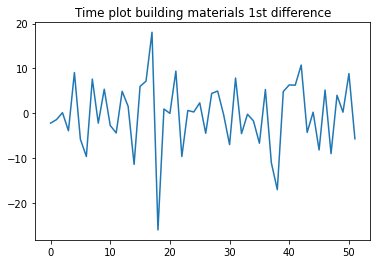

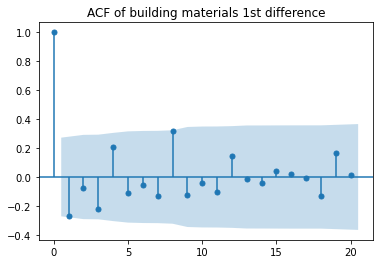

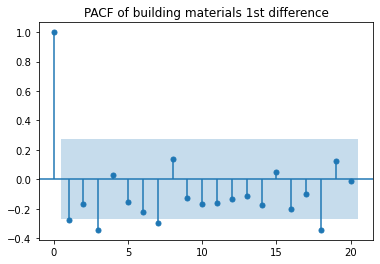

In [26]:
X = new_drop_new.values
diff = list()
for i in range(1, len(X)):
	value = X[i] - X[i - 1]
	diff.append(value)
pyplot.plot(diff)
pyplot.title('Time plot building materials 1st difference')

# ACF plot of time series
plot_acf(diff, title='ACF of building materials 1st difference', lags=24)

# PACF plot of time series
plot_pacf(diff, title='PACF of building materials 1st difference', lags=24)
pyplot.show()

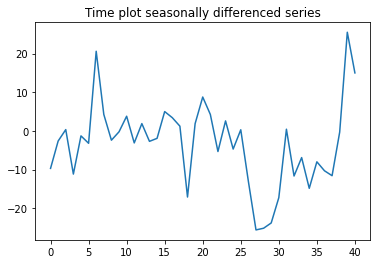

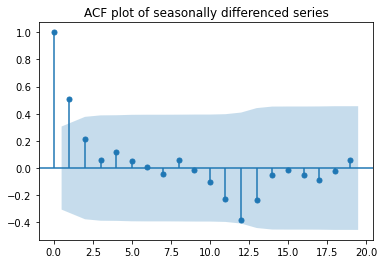

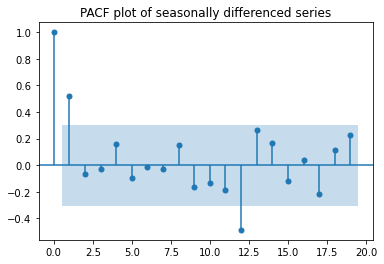

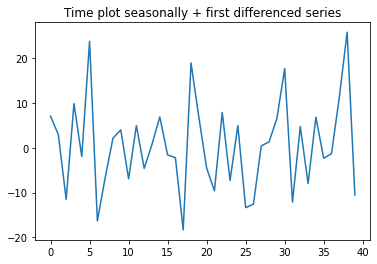

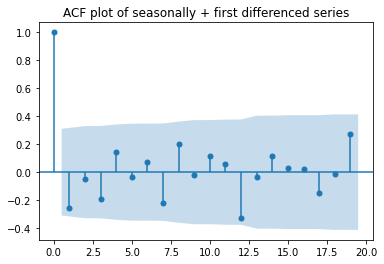

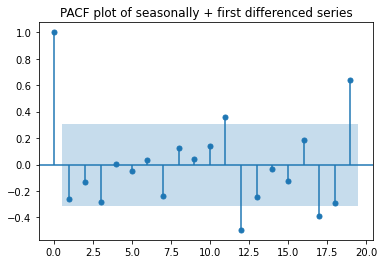

In [31]:
from pandas import read_excel
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from matplotlib import pyplot


#  Seaonal difference
X = new_drop_new.values
SeasDiff = list()
for i in range(12, len(X)):
	value = X[i] - X[i - 12]
	SeasDiff.append(value)
    
# Time, ACF, and PACF plots for the seasonally differenced series
pyplot.plot(SeasDiff)
pyplot.title('Time plot seasonally differenced series')
plot_acf(SeasDiff, title='ACF plot of seasonally differenced series', lags=19)
plot_pacf(SeasDiff, title='PACF plot of seasonally differenced series', lags=19)
pyplot.show()

# Seasonal + First difference
Y = SeasDiff
SeasFirstDiff = list()
for i in range(1, len(Y)):
	value = Y[i] - Y[i - 1]
	SeasFirstDiff.append(value)
pyplot.plot(SeasFirstDiff)
pyplot.title('Time plot seasonally + first differenced series')
plot_acf(SeasFirstDiff, title='ACF plot of seasonally + first differenced series', lags=19)
plot_pacf(SeasFirstDiff, title='PACF plot of seasonally + first differenced series', lags=19)
pyplot.show()

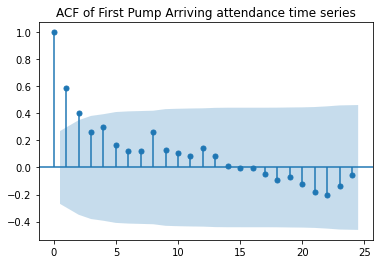

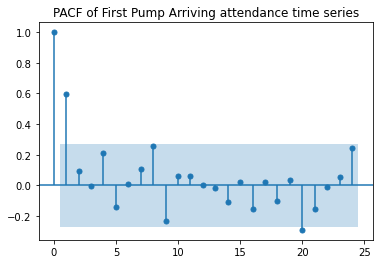

In [26]:
from pandas import read_excel
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# ACF plot on 24 time lags
plot_acf(new_drop_new, title='ACF of First Pump Arriving attendance time series', lags=24)

# PACF plot on 24 time lags
plot_pacf(new_drop_new, title='PACF of First Pump Arriving attendance time series', lags=24)
pyplot.show()

In [32]:
from pandas import read_excel
import matplotlib.pyplot as plt
import statsmodels.api as sm  
import warnings
import itertools
plt.style.use('fivethirtyeight')

df = read_excel('new_drop_new_month_new.xlsx', sheet_name='new_drop_new_month_new', header=0, 
                index_col=0, parse_dates=True, squeeze=True)

#===================================================
#Identifying the parameters with smallest AIC
#===================================================
#Define the p, d and q parameters to take any value between 0 and 1
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

#print(len(pdq))
warnings.filterwarnings("ignore") # specify to ignore warning messages

# Find the best combination of param and param_seasonal which satisfies minimum AIC
collectAICs= []
parameter = []
parameter_seasonal = []
for param in pdq:
    for param_seasonal in seasonal_pdq:
        mod = sm.tsa.statespace.SARIMAX(df,
                                        order=param,
                                        seasonal_order=param_seasonal,                                        
                                        enforce_invertibility=False)
        results = mod.fit()
        print('ARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results.aic))
        collectAICs.append(results.aic)
        parameter.append(param)
        parameter_seasonal.append(param_seasonal)      
index = collectAICs.index(min(collectAICs))
print(collectAICs)
print("The most appropriate combination:","parameter:",parameter[index],
      "parameter_seasonal:",parameter_seasonal[index],"Corresponding AIC:",
      collectAICs[index])


ARIMA(0, 0, 0)x(0, 0, 0, 12) - AIC:760.0402798633858
ARIMA(0, 0, 0)x(0, 0, 1, 12) - AIC:718.6638136375802
ARIMA(0, 0, 0)x(0, 1, 0, 12) - AIC:316.3154881158204
ARIMA(0, 0, 0)x(0, 1, 1, 12) - AIC:2103.572513889305
ARIMA(0, 0, 0)x(1, 0, 0, 12) - AIC:489.8222753271424
ARIMA(0, 0, 0)x(1, 0, 1, 12) - AIC:486.9131610058904
ARIMA(0, 0, 0)x(1, 1, 0, 12) - AIC:312.937602512542
ARIMA(0, 0, 0)x(1, 1, 1, 12) - AIC:314.911746190972
ARIMA(0, 0, 1)x(0, 0, 0, 12) - AIC:694.569837789617
ARIMA(0, 0, 1)x(0, 0, 1, 12) - AIC:652.456570207577
ARIMA(0, 0, 1)x(0, 1, 0, 12) - AIC:306.9263729637157
ARIMA(0, 0, 1)x(0, 1, 1, 12) - AIC:1795.576865714384
ARIMA(0, 0, 1)x(1, 0, 0, 12) - AIC:471.0644747653598
ARIMA(0, 0, 1)x(1, 0, 1, 12) - AIC:469.7605624851534
ARIMA(0, 0, 1)x(1, 1, 0, 12) - AIC:303.89633441326316
ARIMA(0, 0, 1)x(1, 1, 1, 12) - AIC:305.7110152062905
ARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:360.31070576377607
ARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:361.12783851148953
ARIMA(0, 1, 0)x(0, 1, 0, 12) - AIC:301.91590755

/opt/conda/envs/sds2020/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/conda/envs/sds2020/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                                      SARIMAX Results                                       
Dep. Variable:     FirstPumpArriving_AttendanceTime   No. Observations:                   53
Model:              SARIMAX(0, 1, 1)x(1, 1, [], 12)   Log Likelihood                -142.942
Date:                              Sun, 08 Aug 2021   AIC                            291.884
Time:                                      08:27:14   BIC                            296.951
Sample:                                  01-01-2017   HQIC                           293.716
                                       - 05-01-2021                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.4370      0.212     -2.057      0.040      -0.853      -0.021
ar.S.L12      -0.57

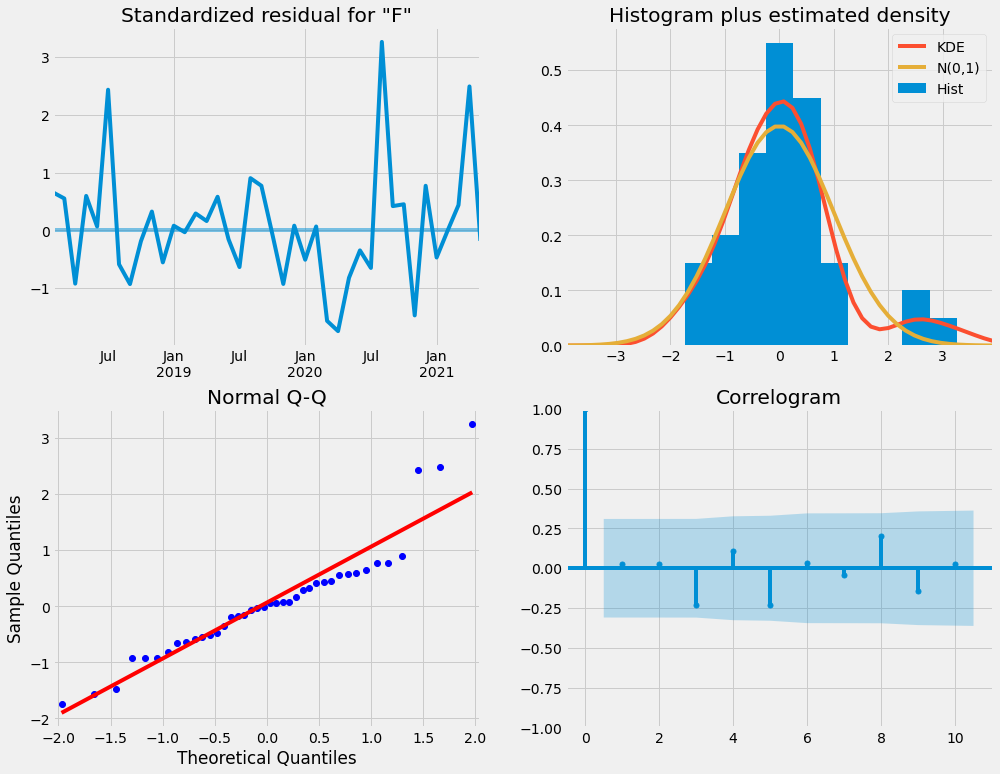

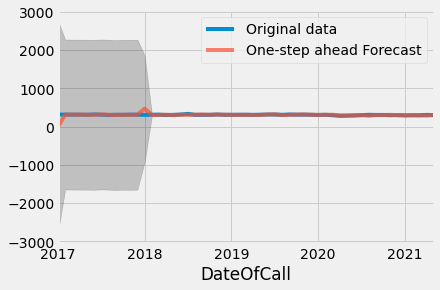

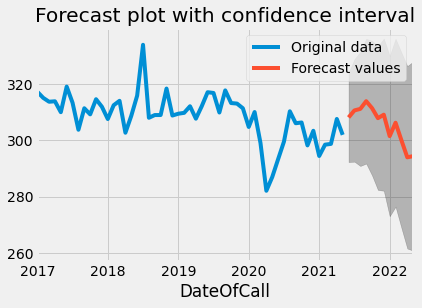

MSE of the forecasts is 2462.69


In [1]:
from pandas import read_excel
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm  
plt.style.use('fivethirtyeight')

#==================================================================
#Loading the data set
df = read_excel('new_drop_new_month_new.xlsx', sheet_name='new_drop_new_month_new', header=0, 
                index_col=0, parse_dates=True, squeeze=True)
#==================================================================

#==================================================================
#Fitting the ARIMA model and printing related statistics
# ARIMA(0, 1, 1)(0,1,1)12 in this case; 
#this one is based on MA1 model template
mod = sm.tsa.statespace.SARIMAX(df, order=(0,1,1), seasonal_order=(1,1,0,12))
results = mod.fit(disp=False)
print(results.summary())
#==================================================================

#GRAPH BLOCK1======================================================
#Printing the graphical statistics of model (correlogram = ACF plot)
results.plot_diagnostics(figsize=(15, 12))
plt.show() 
#==================================================================

#GRAPH BLOCK2======================================================
# printing the part of forecasts fitted to original data (for accuracy evaluation)
# the start date has to be provided; hence should be a time within the original time series;
# in this case, it is to start on 01 January 2000
pred = results.get_prediction(start=pd.to_datetime('2017/01'), dynamic=False)
pred_ci = pred.conf_int()

# printing one-step ahead forecasts together with the original data set;
# hence, the starting point (year) of the data set is required 
# in order to build the plot of original series
ax = df['2017':].plot(label='Original data')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7) 
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
plt.legend()
plt.show()
#===================================================================

#GRAPH BLOCK3=======================================================
# Get forecast 20 steps ahead in future
pred_uc = results.get_forecast(steps=12)
# Get confidence intervals of forecasts
pred_ci = pred_uc.conf_int()
# plotting forecasts ahead
ax = df.plot(label='Original data')
pred_uc.predicted_mean.plot(ax=ax, label='Forecast values', title='Forecast plot with confidence interval')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
plt.legend()
plt.show()
#====================================================================

#====================================================================
# MSE evaluation
y_forecasted = pred.predicted_mean
y_truth = df['2017/01':]
# Compute the mean square error
MSE = ((y_forecasted - y_truth) ** 2).mean()
print('MSE of the forecasts is {}'.format(round(MSE, 2)))
#====================================================================

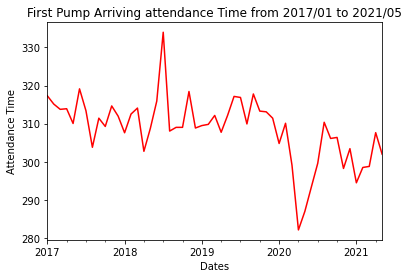

In [18]:
from pandas import read_excel
import matplotlib.pyplot as plt
series = read_excel('new_drop_new_month_new.xlsx', sheet_name='new_drop_new_month_new', header=0, 
              index_col=0, parse_dates=True, squeeze=True)
series.plot(color='red')
plt.xlabel('Dates')
plt.ylabel('Attendance Time')
plt.title('First Pump Arriving attendance Time from 2017/01 to 2021/05')
plt.show()

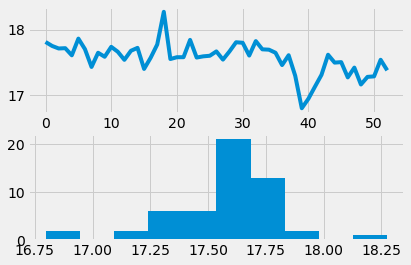

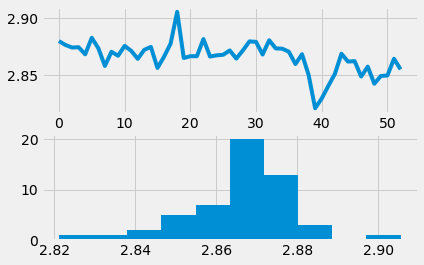

In [38]:
from pandas import read_excel
from pandas import DataFrame
from numpy import sqrt, log
from matplotlib import pyplot
series = read_excel('new_drop_new_month_new.xlsx', sheet_name='new_drop_new_month_new', usecols = [1], 
                             header=0, squeeze=True, dtype=float) 
dataframe = DataFrame(series.values)
dataframe.columns = ['Building']

#================
# Sqrt transform
#================
dataframe['Building'] = sqrt(dataframe['Building'])
pyplot.figure(1)
# line plot
pyplot.subplot(211)
pyplot.plot(dataframe['Building'])
# histogram
pyplot.subplot(212)
pyplot.hist(dataframe['Building'])
pyplot.show()

#================
# Log transform
#================
dataframe['Building'] = log(dataframe['Building'])
pyplot.figure(1)
# line plot
pyplot.subplot(211)
pyplot.plot(dataframe['Building'])
# histogram
pyplot.subplot(212)
pyplot.hist(dataframe['Building'])
pyplot.show()

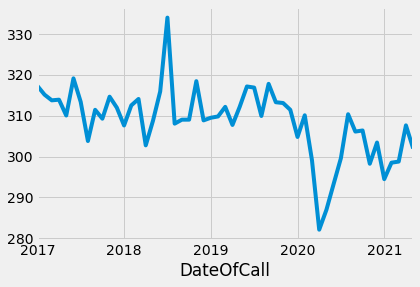

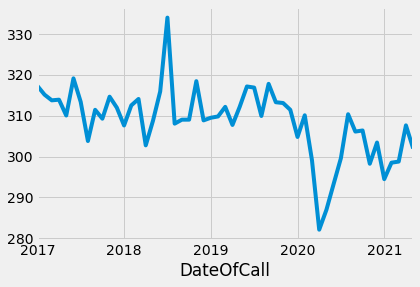

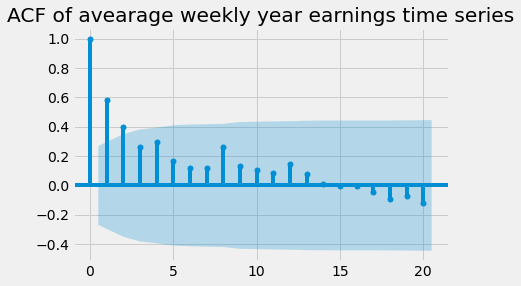

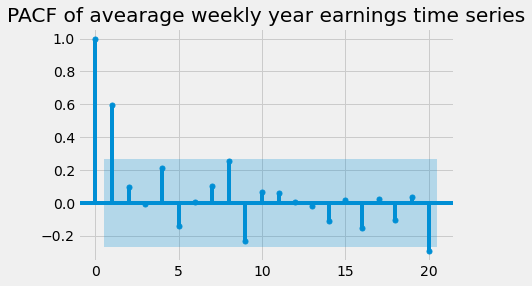

Forecasting worker weekly year earnings  with Holt-Winters method


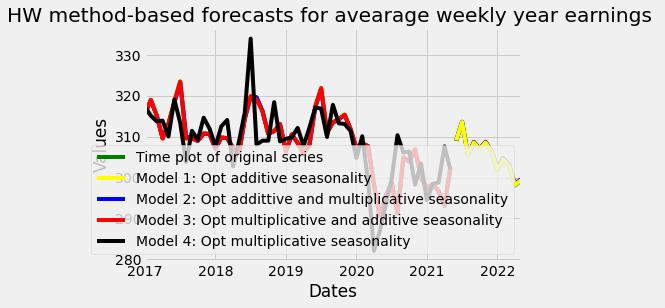

KeyError: 'smoothing_slope'

In [41]:
#avearage weekly year earnings data
from pandas import read_excel
import pandas as pd
from statsmodels.tsa.api import ExponentialSmoothing
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
series = read_excel('new_drop_new_month_new.xlsx', sheet_name='new_drop_new_month_new', header=0, 
              index_col=0, parse_dates=True, squeeze=True)
series.plot()
pyplot.show()
series.plot()
pyplot.show()
# ACF plot on 50 time lags
plot_acf(series, title='ACF of avearage weekly year earnings time series', lags=20)

# PACF plot on 50 time lags
plot_pacf(series, title='PACF of avearage weekly year earnings time series', lags=20)
pyplot.show()
# ===================================
# Holt-Winter method in different scenarios # 

# ===================================
# Model1 : Holt-Winter method with additive trend and seasonality 
# Here, the parameters alpha, beta, and gamma are optimized
# ===================================
fit1 = ExponentialSmoothing(series, seasonal_periods=12, trend='add', seasonal='add').fit()
fit1.fittedvalues.plot(color='green')

# ===================================
# Model 2: Holt-Winter method with additive trend and multiplicative seasonality 
# Here, the parameters alpha, beta, and gamma are optimized
# ===================================
fit2 = ExponentialSmoothing(series, seasonal_periods=12, trend='add', seasonal='mul').fit()
fit2.fittedvalues.plot(color='yellow')
# ===================================
# Mode3 : Holt-Winter method with additive trend and seasonality 
# Here, the parameters alpha, beta, and gamma are optimized
# ===================================
fit3 = ExponentialSmoothing(series, seasonal_periods=12, trend='mul', seasonal='add').fit()
fit3.fittedvalues.plot(color='blue')
# ===================================
# Model 4: Holt-Winter method with additive trend and seasonality 
# Here, the parameters alpha, beta, and gamma are optimized
# ===================================
fit4 = ExponentialSmoothing(series, seasonal_periods=12, trend='mul', seasonal='mul').fit()
fit4.fittedvalues.plot(color='red')

print("Forecasting worker weekly year earnings  with Holt-Winters method")
#=====================================
# Time and forecast plots 
#=====================================
series.rename('Time plot of original series').plot(color='black', legend=True)
fit1.forecast(12).rename('Model 1: Opt additive seasonality').plot(color='red', legend=True)
fit2.forecast(12).rename('Model 2: Opt addittive and multiplicative seasonality').plot(color='blue', legend=True)
fit3.forecast(12).rename('Model 3: Opt multiplicative and additive seasonality').plot(color='green', legend=True)
fit4.forecast(12).rename('Model 4: Opt multiplicative seasonality').plot(color='yellow', legend=True)
pyplot.xlabel('Dates')
pyplot.ylabel('Values')
pyplot.title('HW method-based forecasts for avearage weekly year earnings ')
pyplot.show()


#====================================
# Evaluating the errors 
#====================================
from sklearn.metrics import mean_squared_error 
MSE1=mean_squared_error(fit1.fittedvalues, series)
MSE2=mean_squared_error(fit2.fittedvalues, series)
MSE3=mean_squared_error(fit3.fittedvalues, series)
MSE4=mean_squared_error(fit4.fittedvalues, series)

#=====================================
# Printing the paramters and errors for each scenario
#=====================================
results=pd.DataFrame(index=[r"alpha", r"beta", r"gamma", r"l0", "b0", "MSE"])
params = ['smoothing_level', 'smoothing_slope', 'smoothing_seasonal', 'initial_level', 'initial_slope']
results["HW model 1"] = [fit1.params[p] for p in params] + [MSE1]
results["HW model 2"] = [fit2.params[p] for p in params] + [MSE2]
results["HW model 3"] = [fit3.params[p] for p in params] + [MSE3]
results["HW model 4"] = [fit4.params[p] for p in params] + [MSE4]
print(results)

#=====================================
# Evaluating and plotting the residual series for each scenario
#=====================================
residuals1= fit1.fittedvalues - series
residuals2= fit2.fittedvalues - series
residuals3= fit3.fittedvalues - series
residuals4= fit4.fittedvalues - series
residuals1.rename('residual plot for model 1').plot(color='red', legend=True)
residuals2.rename('residual plot for model 2').plot(color='blue', legend=True)
residuals3.rename('residual plot for model 3').plot(color='green', legend=True)
residuals4.rename('residual plot for model 4').plot(color='yellow', legend=True)
pyplot.title('Residual plots for models 1-4')
pyplot.show()

#=====================================
# ACF plots of the residual series for each scenario
#=====================================
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(residuals1, title='Residual ACF for model 1', lags=20)
plot_acf(residuals2, title='Residual ACF for model 2', lags=20)
plot_acf(residuals3, title='Residual ACF for model 3', lags=20)
plot_acf(residuals4, title='Residual ACF for model 4', lags=20)
pyplot.show()
